### ANOVA F-Test for Selecting Numerical Features
- analysis of variance is collection of statistical models and associated estimation procedures used to analyze differences among means
- larger F-score = better -> more relevant to target var.
- p-value < 0.05 = better -> less statistical difference btwn the groups

In [1]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score
, average_precision_score, f1_score, classification_report, accuracy_score
, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

# load and prepare data
df = pd.read_csv('data.csv', na_values='?')
df = df.rename(columns={'num       ': 'target'})
df['target'].value_counts(dropna=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [2]:
df = df.drop(['slope', 'ca', 'thal'], axis=1)
df = df.dropna().copy()
df.info() #recheck

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       261 non-null    int64  
 1   sex       261 non-null    int64  
 2   cp        261 non-null    int64  
 3   trestbps  261 non-null    float64
 4   chol      261 non-null    float64
 5   fbs       261 non-null    float64
 6   restecg   261 non-null    float64
 7   thalach   261 non-null    float64
 8   exang     261 non-null    float64
 9   oldpeak   261 non-null    float64
 10  target    261 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 24.5 KB


In [3]:
# x = numerical variables
x = df.loc[:, ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y = df.loc[:, 'target']

fs = SelectKBest(score_func=f_classif, k='all')  # call the method
bestFeatures = fs.fit(x, y)    # train the model
np.set_printoptions(suppress = True)
print("F-Score:")
print(bestFeatures.scores_)    # print out the scores 
print("P-value:")
print(bestFeatures.pvalues_) # remove numrical variable w/ p-value larger than 0.05

F-Score:
[  6.82632116   5.8238516   12.91406861  35.0095821  121.87191614]
P-value:
[0.00950736 0.01650507 0.00039027 0.00000001 0.        ]


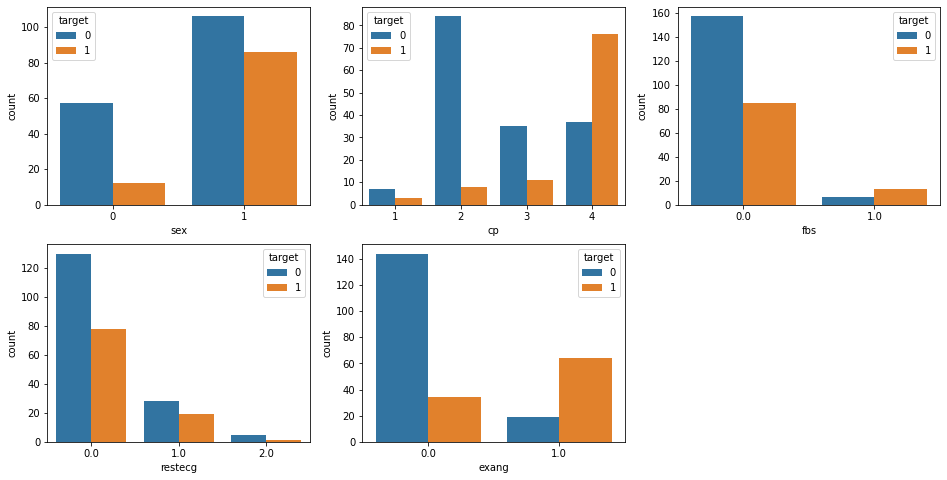

In [4]:
# Categorical Features vs. Target -  Grouped Bar Chart or Stacked Bar Chart
cat_list=['sex','cp', 'fbs', 'restecg','exang']
fig=plt.figure(figsize=(16,8))
for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(2,3,i+1)
    chart=sns.countplot(x=column, hue='target', data=df)

### Chi-Squared Test for Selecting Categorical Variables
- determine whether there is stat. significant difference btwn expected frequencies and observed frequencies in one or more categories
- smaller value means not much sig. difference -> lower value = better
- determined as a ratio 
- same standard for p-value as above -> should be smaller than 0.05 (ideal)
- larger than 0.05 = less to no significant diff.

In [5]:
# x = categorical variables
x = df.loc[:, ['sex', 'cp', 'chol', 'fbs', 'restecg','exang']]
y = df.loc[:, 'target']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)
print("Chi-squared score:")
print(catFeatures.scores_)
print("P-value:")
print(catFeatures.pvalues_)

Chi-squared score:
[  4.29633702  20.65657842 214.00321364   7.72294782   0.09613185
  55.39491131]
P-value:
[0.03819455 0.00000549 0.         0.00545233 0.75652189 0.        ]


- The chi squared value of 214 represents the variable with the least significant difference, so category 'chol' is very
significant to the target
- the p-value 0.757 is too large, which means that there is NO SIGNIFICANCE -> we must drop this column! 

In [6]:
print(catFeatures.pvalues_)

[0.03819455 0.00000549 0.         0.00545233 0.75652189 0.        ]


In [7]:
df_dropped = df.drop('restecg', axis=1)
df_dropped.head(5)

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,target
0,28,1,2,130.0,132.0,0.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,160.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,150.0,0.0,0.0,0
5,32,0,2,105.0,198.0,0.0,165.0,0.0,0.0,0


### Dummy Variables
- *dummy variable*: numerical variable used in regression analysis to represent subgroups of sample in your study

In [8]:
# transform categorical variables to dummy variables
df_withdummies = pd.get_dummies(df_dropped, columns=['sex','cp', 'fbs','exang'], drop_first=True)
# drop_first = drop the first option for the category -> in our example, we don't need separate cols for each sex -> we can 
# merge this col into one
# we want to use 1 for female, 0 for male; same case for cp
# find a way to reduce number of dummy variable needed
df_withdummies.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_2,cp_3,cp_4,fbs_1.0,exang_1.0
0,28,130.0,132.0,185.0,0.0,0,1,1,0,0,0,0
1,29,120.0,243.0,160.0,0.0,0,1,1,0,0,0,0
3,30,170.0,237.0,170.0,0.0,0,0,0,0,0,0,0
4,31,100.0,219.0,150.0,0.0,0,0,1,0,0,0,0
5,32,105.0,198.0,165.0,0.0,0,0,1,0,0,0,0


- w/ the sex, if it is 0 we can assume it must be male since that's the only other choice
- can assume all three (2 - 4) cp = 0 means that cp_1 is 1

### Split & Balance the Data
- *split*: split into test and training data
- *balance*: when the target sample is too small (ie, large amount of people had heart attack, small amount DID NOT have
heart attack), so we cannot accurately use this data; **balance the testing data**; adding to the testing data (manipulate the data), so we must do this only after splitting
- must stratify the target data to ensure that proportion stays the same after splitting

In [9]:
# split the data
x = df_withdummies.loc[:, df_withdummies.columns!='target'] # get dummies that don't match target
y = df_withdummies['target']

# split the data 80%, 20% ratio for separating testing and training
# need stratify when target var is CATEGORICAL -> keep same proportion/ratio of positive and negative cases when separating
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)  # declare method

In [10]:
# must check shape of data -> training data should have same num of rows, test = cols
print("Training Shapes:")
print(x_train.shape)
print(y_train.shape)

Training Shapes:
(208, 11)
(208,)


In [11]:
print("Testing Shapes:")
print(x_test.shape)
print(y_test.shape)

Testing Shapes:
(53, 11)
(53,)


In [15]:
# balance the training data
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)  # call the method

oversampled_x,oversampled_y=os.fit_resample(x_train, y_train)

In [16]:
print("Training shape:")
print(x_train.shape)
print("Oversample shape:")
print(oversampled_x.shape)

Training shape:
(208, 11)
Oversample shape:
(260, 11)


In [18]:
# build prediction model
LogRegression = LogisticRegression(penalty='none', max_iter=2000)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())

# By default, max_iter =100, and you do not have to set this parameter.
# However, if it reports an error 'ConvergenceWarning: lbfgs failed to converge (status = 1)', 
# set up max_iter to a higher value. 

LogisticRegression(max_iter=2000, penalty='none')

In [21]:
# predict the test data
test_pred = LogRegression.predict(x_test)

In [24]:
# Accuracy score - evaluate the model
accuracy_score(y_test, test_pred)

NameError: name 'accuracy_score' is not defined

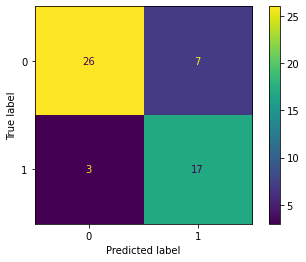

In [25]:
# view the model
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(LogRegression, x_test, y_test)

# x = predicted num, y = test num
# if they are the same, then it is accurate

In [26]:
# get intercepts and coef.
print(LogRegression.intercept_)
pd.DataFrame(data={'variable': x_train.columns, 'coefficient': LogRegression.coef_[0]})

[-0.18455711]


,variable,coefficient
0,age,0.003810
1,trestbps,-0.009390
2,chol,0.005442
3,thalach,-0.005955
4,oldpeak,1.746136
5,sex_1,1.542631
6,cp_2,-3.697050
7,cp_3,-2.146769
8,cp_4,-1.011550
9,fbs_1.0,2.217911
